# Introduction

This script is to plot the heatmap for industrial section. We group our features into four categories:

- Size
- Profitability
- Growth
- Risk/Financial leverage


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [2]:
rename_col_dict = {
	'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)': 't_ev',
	'Total Revenue [LTM] ($USDmm, Historical rate)':							  't_rev',
	'EBITDA [LTM] ($USDmm, Historical rate)': 									  'ebitda',
	'EBITDA Margin % [LTM]': 													  'ebitda_margin',
	'TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x)': 			  't_ev/t_rev',
	'TEV/LTM EBITDA [My Setting] [LTM as of 12/31/2016] (x)': 					  't_ev/ebitda',
	'Est. Annual Revenue Growth - 1 Yr % - Capital IQ [Latest] (%)':			  'est_ann_rev_gr_1yr',
	'Est. Annual EBITDA Growth - 1 Yr % - Capital IQ [Latest] (%)':				  'est_ann_ebitda_gr_1yr',
	'Total Revenues, 1 Yr Growth % [LTM] (%)':									  't_rev_1yr_growth',
	'EBITDA, 1 Yr Growth % [LTM] (%)':											  'ebitda_1yr_growth',
	'Total Revenues, 3 Yr CAGR % [LTM] (%)':									  't_rev_3_yr_cagr',
	'EBITDA, 3 Yr CAGR % [LTM] (%)':											  'ebitda_3yr_cagr',
	'Total Revenues, 5 Yr CAGR % [LTM] (%)':									  't_rev_5yr_cagr',
	'EBITDA, 5 Yr CAGR % [LTM] (%)':											  'ebitda_5yr_cagr',
	'Return on Assets % [LTM]':													  'return_on_assets',
	'Return on Equity % [LTM]':													  'return_on_equity',
	'Capex as % of Revenues [Latest Annual] (%)':								  'capex_as_percent_rev',
	'EBITDA / Interest Exp. [LTM]':												  'ebitda/interest_exp',
	'Total Debt/Capital % [Latest Annual]':										  't_debt/cap_percent',
	'Total Debt/Equity % [Latest Annual]':										  't_debt/equity_percent'
	}

industrials = pd.read_excel('../data/U of M Student Data - Industrials.xlsx', 'Screening', 
                            skiprows=7, na_values=['-', 'NM'] )

industrials = industrials.iloc[:, 5::]

industrials.rename(columns=rename_col_dict, inplace=True)

## Four categories of features

From Google doc, the last question, Nick divided part of the features into three categories. For the unaddressed features, I asked Derek and classify them into following categories:  

- size: `t_rev`, `ebitda`
- profitability: `ebitda_margin`, `return_on_assets`, `return_on_equity`, `ebitda/interest_exp`
- growth: `est_ann_rev_gr_minus_1yr_minus_capiq`, `est_ann_ebitda_gr_minus_1yr_minus_capiq`, `t_rev_1yr_growth`, `ebitda_1yr_growth`, `t_rev_3_yr_cagr`, `ebitda_3yr_cagr`, `t_rev_5yr_cagr`, `ebitda_5yr_cagr`, `capex_as_percent_rev`
- risk: `t_debt/cap_percent`, `t_debt/equity_percent`
        

In [3]:
col = ['t_ev', 
       't_rev', 'ebitda',
       'ebitda_margin', 'return_on_assets', 'return_on_equity', 'ebitda/interest_exp', 
       'est_ann_rev_gr_1yr', 'est_ann_ebitda_gr_1yr', 
       't_rev_1yr_growth', 'ebitda_1yr_growth', 't_rev_3_yr_cagr', 'ebitda_3yr_cagr', 
       't_rev_5yr_cagr', 'ebitda_5yr_cagr', 'capex_as_percent_rev', 
       't_debt/cap_percent', 't_debt/equity_percent']
industrials_reorder = industrials[col]

In [5]:
industrials_reorder.head()

,t_ev,t_rev,ebitda,ebitda_margin,return_on_assets,return_on_equity,ebitda/interest_exp,est_ann_rev_gr_1yr,est_ann_ebitda_gr_1yr,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,capex_as_percent_rev,t_debt/cap_percent,t_debt/equity_percent
0,117144.9,30109.0,8676.3,28.80,13.80,45.80,43.6,1.06,NaN,-0.545,2.14,-0.83,2.580,0.334,3.20,4.720,53.0,112.6
1,7892.2,2627.2,517.5,19.70,10.40,22.00,72.9,6.32,14.8,4.090,20.90,7.43,19.200,10.400,25.50,2.870,14.7,17.3
2,1702.2,389.5,94.4,24.20,19.90,27.20,NaN,10.10,16.1,12.500,17.70,6.14,11.100,7.720,18.80,5.850,NaN,NaN
3,1243.0,1673.0,121.4,7.26,3.01,5.29,22.5,4.76,22.4,3.650,164.50,-5.18,-12.000,-2.650,-9.55,5.320,14.6,17.1
4,2481.2,5144.7,163.7,3.18,3.01,6.29,15.7,3.25,13.4,5.040,10.70,5.13,-0.203,3.910,-1.37,0.855,21.6,27.5


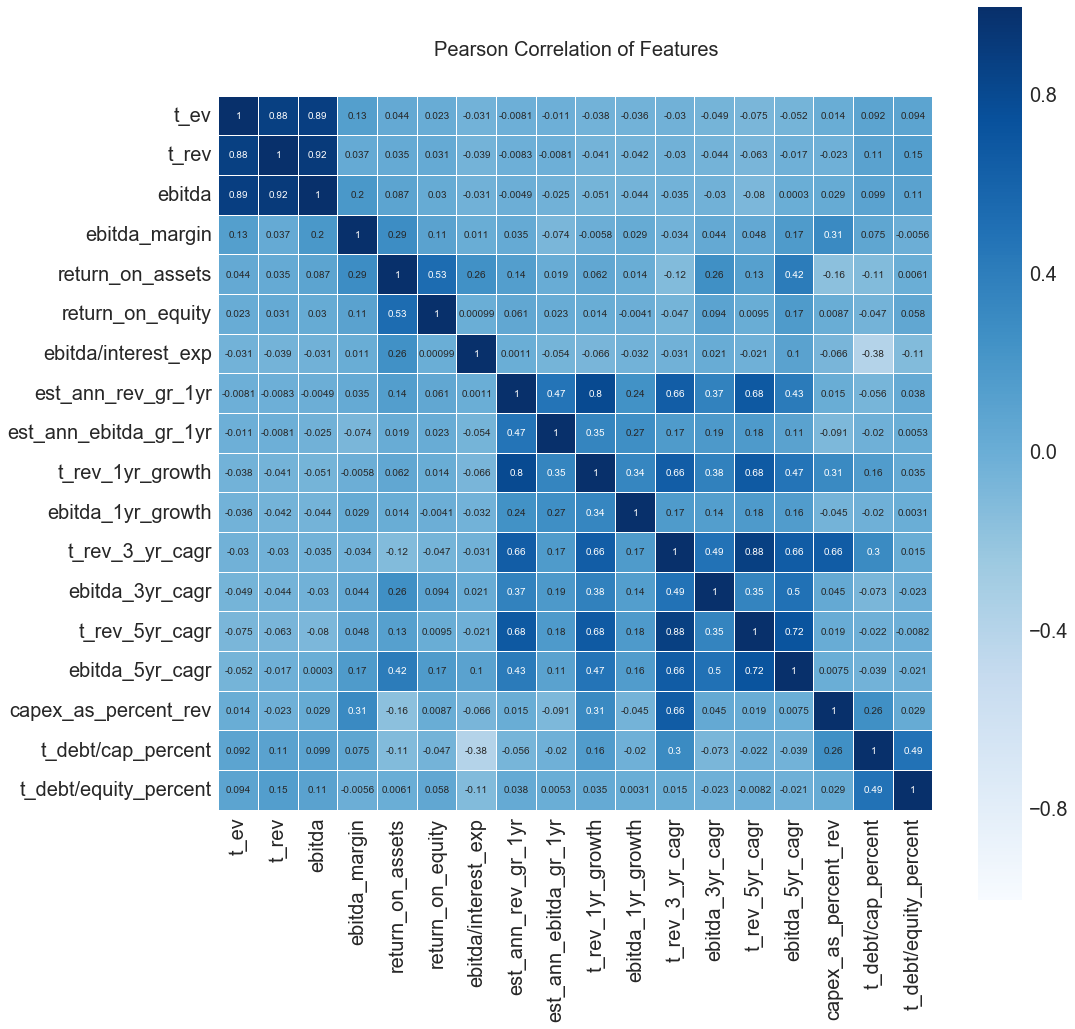

In [4]:
#colormap = plt.cm.
sns.set(font_scale=2)
plt.figure( figsize=(16,16) )
plt.title( 'Pearson Correlation of Features', y=1.05, size=20)
fig = sns.heatmap( industrials_reorder.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap='Blues', linecolor='white', annot=True,annot_kws={"size": 10} )